In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/SI_670_Project/Data/WikiLarge_Train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/SI_670_Project/Data/WikiLarge_Test.csv')

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
y_train = train_data["label"]
X_test = test_data["original_text"]
X_train = train_data["original_text"]
#y_test = test_data["label"]
vectorizer= TfidfVectorizer(min_df=3,max_features=None, strip_accents='unicode', analyzer='word',ngram_range=(1, 3),stop_words = 'english')
vectorizer.fit(X_train)
X_train =  vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
feature_names = np.array(vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [6]:
from keras import Sequential
from keras.models import Model
from keras.models import Sequential
from keras.layers import InputLayer
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Input
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
from keras.layers import Conv1D, MaxPooling1D

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve

In [8]:
X_train.shape

(416768, 662671)

In [9]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=128, n_iter=5, random_state=1)
svd.fit(X_train)
X_train = svd.transform(X_train)
X_test = svd.transform(X_test)


accuracy
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  from ipykernel import kernelapp as app


9378/9378 [==============================] - 40s 4ms/step - loss: 0.6314 - accuracy: 0.6188 - val_loss: 0.5502 - val_accuracy: 0.7485
[CV 1/5] END batch_size=32, validation_split=0.1;, score=0.468 total time=  45.5s
9378/9378 [==============================] - 38s 4ms/step - loss: 0.6308 - accuracy: 0.6200 - val_loss: 0.5274 - val_accuracy: 0.7954
[CV 2/5] END batch_size=32, validation_split=0.1;, score=0.413 total time=  45.3s
9378/9378 [==============================] - 38s 4ms/step - loss: 0.6371 - accuracy: 0.6179 - val_loss: 0.7407 - val_accuracy: 0.3796
[CV 3/5] END batch_size=32, validation_split=0.1;, score=0.605 total time=  42.2s
9378/9378 [==============================] - 38s 4ms/step - loss: 0.5727 - accuracy: 0.7157 - val_loss: 1.0151 - val_accuracy: 0.1440
[CV 4/5] END batch_size=32, validation_split=0.1;, score=0.145 total time=  47.0s
9378/9378 [==============================] - 38s 4ms/step - loss: 0.5718 - accuracy: 0.7164 - val_loss: 0.9695 - val_accuracy: 0.1699
[C

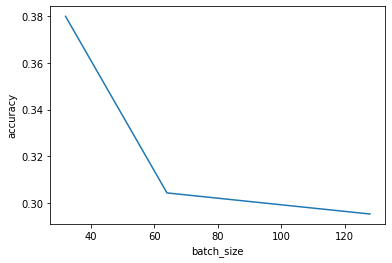

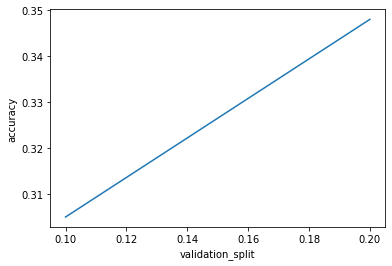

0.360 for {'batch_size': 32, 'validation_split': 0.1}
0.400 for {'batch_size': 32, 'validation_split': 0.2}
0.292 for {'batch_size': 64, 'validation_split': 0.1}
0.316 for {'batch_size': 64, 'validation_split': 0.2}
0.263 for {'batch_size': 128, 'validation_split': 0.1}
0.328 for {'batch_size': 128, 'validation_split': 0.2}

 For the model with the best accuracy


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


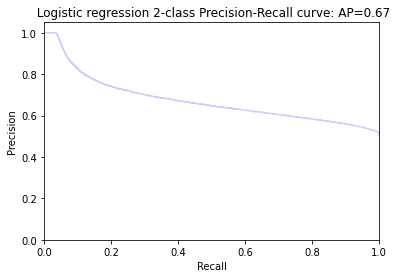

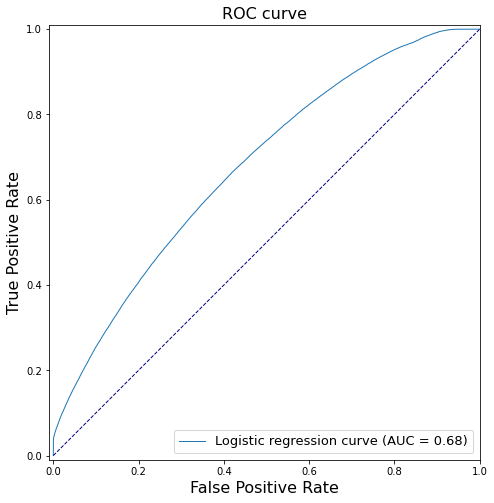

recall
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  from ipykernel import kernelapp as app


9378/9378 [==============================] - 38s 4ms/step - loss: 0.6318 - accuracy: 0.6188 - val_loss: 0.4706 - val_accuracy: 0.8712
[CV 1/5] END batch_size=32, validation_split=0.1;, score=0.300 total time=  45.4s
9378/9378 [==============================] - 38s 4ms/step - loss: 0.6304 - accuracy: 0.6198 - val_loss: 0.4640 - val_accuracy: 0.8703
[CV 2/5] END batch_size=32, validation_split=0.1;, score=0.299 total time=  45.3s
9378/9378 [==============================] - 38s 4ms/step - loss: 0.6364 - accuracy: 0.6181 - val_loss: 0.8354 - val_accuracy: 0.2595
[CV 3/5] END batch_size=32, validation_split=0.1;, score=0.919 total time=  47.0s
9378/9378 [==============================] - 38s 4ms/step - loss: 0.5721 - accuracy: 0.7160 - val_loss: 1.1457 - val_accuracy: 0.1082


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END batch_size=32, validation_split=0.1;, score=0.000 total time=  47.0s
9378/9378 [==============================] - 38s 4ms/step - loss: 0.5727 - accuracy: 0.7160 - val_loss: 1.0667 - val_accuracy: 0.1284


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END batch_size=32, validation_split=0.1;, score=0.000 total time=  45.4s
8336/8336 [==============================] - 37s 4ms/step - loss: 0.6423 - accuracy: 0.5985 - val_loss: 0.6131 - val_accuracy: 0.6120
[CV 1/5] END batch_size=32, validation_split=0.2;, score=0.630 total time=  47.0s
8336/8336 [==============================] - 37s 4ms/step - loss: 0.6425 - accuracy: 0.5987 - val_loss: 0.5875 - val_accuracy: 0.6744
[CV 2/5] END batch_size=32, validation_split=0.2;, score=0.554 total time=  43.4s
8336/8336 [==============================] - 37s 4ms/step - loss: 0.6164 - accuracy: 0.6583 - val_loss: 0.8929 - val_accuracy: 0.2151
[CV 3/5] END batch_size=32, validation_split=0.2;, score=0.939 total time=  42.7s
8336/8336 [==============================] - 36s 4ms/step - loss: 0.4925 - accuracy: 0.7937 - val_loss: 1.3992 - val_accuracy: 0.0809


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END batch_size=32, validation_split=0.2;, score=0.000 total time=  45.3s
8336/8336 [==============================] - 37s 4ms/step - loss: 0.4921 - accuracy: 0.7935 - val_loss: 1.4698 - val_accuracy: 0.0821


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END batch_size=32, validation_split=0.2;, score=0.000 total time=  41.1s
4689/4689 [==============================] - 20s 4ms/step - loss: 0.6348 - accuracy: 0.6146 - val_loss: 0.4323 - val_accuracy: 0.9175
[CV 1/5] END batch_size=64, validation_split=0.1;, score=0.215 total time=  26.6s
4689/4689 [==============================] - 20s 4ms/step - loss: 0.6347 - accuracy: 0.6158 - val_loss: 0.4769 - val_accuracy: 0.8892
[CV 2/5] END batch_size=64, validation_split=0.1;, score=0.265 total time=  25.3s
4689/4689 [==============================] - 20s 4ms/step - loss: 0.6407 - accuracy: 0.6150 - val_loss: 0.7287 - val_accuracy: 0.4206
[CV 3/5] END batch_size=64, validation_split=0.1;, score=0.793 total time=  24.8s
4689/4689 [==============================] - 20s 4ms/step - loss: 0.5760 - accuracy: 0.7144 - val_loss: 0.9792 - val_accuracy: 0.1354


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END batch_size=64, validation_split=0.1;, score=0.000 total time=  26.5s
4689/4689 [==============================] - 19s 4ms/step - loss: 0.5752 - accuracy: 0.7149 - val_loss: 1.1166 - val_accuracy: 0.1053


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END batch_size=64, validation_split=0.1;, score=0.000 total time=  24.9s
4168/4168 [==============================] - 19s 4ms/step - loss: 0.6461 - accuracy: 0.5933 - val_loss: 0.5927 - val_accuracy: 0.6786
[CV 1/5] END batch_size=64, validation_split=0.2;, score=0.552 total time=  22.7s
4168/4168 [==============================] - 19s 4ms/step - loss: 0.6469 - accuracy: 0.5923 - val_loss: 0.6130 - val_accuracy: 0.6286
[CV 2/5] END batch_size=64, validation_split=0.2;, score=0.602 total time=  27.2s
4168/4168 [==============================] - 19s 4ms/step - loss: 0.6190 - accuracy: 0.6563 - val_loss: 0.8584 - val_accuracy: 0.2221
[CV 3/5] END batch_size=64, validation_split=0.2;, score=0.934 total time=  24.9s
4168/4168 [==============================] - 19s 4ms/step - loss: 0.4952 - accuracy: 0.7928 - val_loss: 1.4099 - val_accuracy: 0.0782


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END batch_size=64, validation_split=0.2;, score=0.000 total time=  24.8s
4168/4168 [==============================] - 19s 4ms/step - loss: 0.4944 - accuracy: 0.7930 - val_loss: 1.3149 - val_accuracy: 0.0834


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END batch_size=64, validation_split=0.2;, score=0.000 total time=  22.9s
2345/2345 [==============================] - 10s 4ms/step - loss: 0.6391 - accuracy: 0.6107 - val_loss: 0.4844 - val_accuracy: 0.8921
[CV 1/5] END batch_size=128, validation_split=0.1;, score=0.249 total time=  16.3s
2345/2345 [==============================] - 10s 4ms/step - loss: 0.6398 - accuracy: 0.6105 - val_loss: 0.4941 - val_accuracy: 0.8818
[CV 2/5] END batch_size=128, validation_split=0.1;, score=0.258 total time=  15.7s
2345/2345 [==============================] - 10s 4ms/step - loss: 0.6447 - accuracy: 0.6109 - val_loss: 0.7521 - val_accuracy: 0.3635
[CV 3/5] END batch_size=128, validation_split=0.1;, score=0.836 total time=  16.3s
2345/2345 [==============================] - 10s 4ms/step - loss: 0.5796 - accuracy: 0.7129 - val_loss: 1.0315 - val_accuracy: 0.1108


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END batch_size=128, validation_split=0.1;, score=0.000 total time=  16.3s
2345/2345 [==============================] - 10s 4ms/step - loss: 0.5795 - accuracy: 0.7136 - val_loss: 1.0994 - val_accuracy: 0.1005


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END batch_size=128, validation_split=0.1;, score=0.000 total time=  14.7s
2084/2084 [==============================] - 10s 5ms/step - loss: 0.6508 - accuracy: 0.5870 - val_loss: 0.5401 - val_accuracy: 0.7903
[CV 1/5] END batch_size=128, validation_split=0.2;, score=0.396 total time=  14.2s
2084/2084 [==============================] - 10s 5ms/step - loss: 0.6508 - accuracy: 0.5872 - val_loss: 0.5920 - val_accuracy: 0.6819
[CV 2/5] END batch_size=128, validation_split=0.2;, score=0.527 total time=  15.4s
2084/2084 [==============================] - 10s 5ms/step - loss: 0.6227 - accuracy: 0.6537 - val_loss: 0.8770 - val_accuracy: 0.1543
[CV 3/5] END batch_size=128, validation_split=0.2;, score=0.963 total time=  13.9s
2084/2084 [==============================] - 10s 4ms/step - loss: 0.4997 - accuracy: 0.7912 - val_loss: 1.4864 - val_accuracy: 0.0697


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END batch_size=128, validation_split=0.2;, score=0.000 total time=  15.4s
2084/2084 [==============================] - 10s 5ms/step - loss: 0.4996 - accuracy: 0.7917 - val_loss: 1.4029 - val_accuracy: 0.0697


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END batch_size=128, validation_split=0.2;, score=0.000 total time=  14.6s
10420/10420 [==============================] - 46s 4ms/step - loss: 0.6137 - accuracy: 0.6603 - val_loss: 0.8869 - val_accuracy: 0.2349
Best parameters set found on training data:

{'batch_size': 32, 'validation_split': 0.2}
Mean score:  [0.30360831 0.42462    0.25465265 0.41747215 0.26868698 0.37729905]


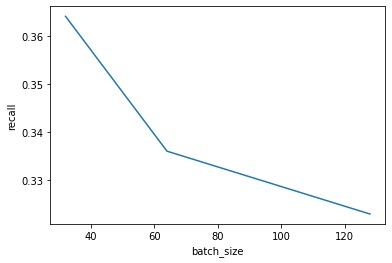

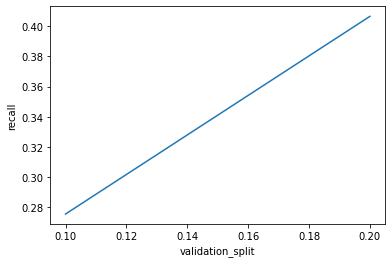

0.304 for {'batch_size': 32, 'validation_split': 0.1}
0.425 for {'batch_size': 32, 'validation_split': 0.2}
0.255 for {'batch_size': 64, 'validation_split': 0.1}
0.417 for {'batch_size': 64, 'validation_split': 0.2}
0.269 for {'batch_size': 128, 'validation_split': 0.1}
0.377 for {'batch_size': 128, 'validation_split': 0.2}

 For the model with the best recall


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


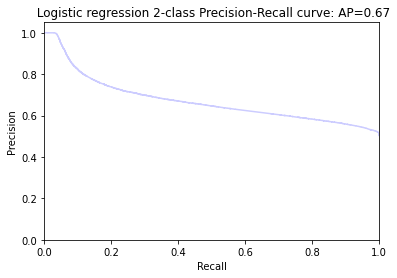

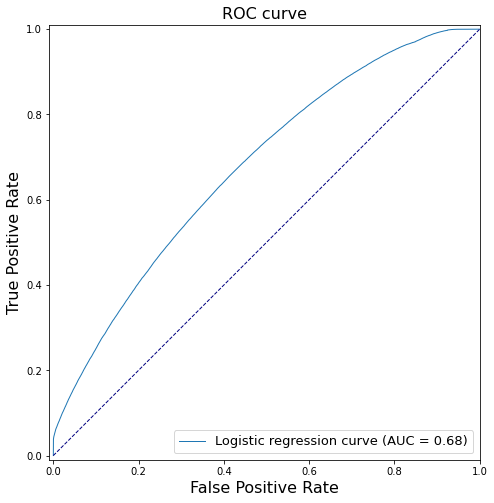

In [11]:
def create_model():
  model = Sequential()
  model.add(Input(shape=(128,)))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

scores = ['accuracy','recall']
for score in scores:
  print(score)
  model = KerasClassifier(build_fn=create_model)
  epochs = np.array([50, 100, 150])
  batches = np.array([5, 10, 20])
  param_grid = {"batch_size":[32,64,128],"validation_split":[0.1,0.2]}
  grid = GridSearchCV(estimator=model, param_grid=param_grid,scoring=score,verbose=5)
  grid_result = grid.fit(X_train, y_train)
  print("Best parameters set found on training data:\n")
  print(grid.best_params_)
  means = grid.cv_results_['mean_test_score']
  print("Mean score: ",means)
  # Plot of score against each hyperparameter
  fig, ax = plt.subplots()
  vs_means = [np.mean(means[::2]),np.mean(means[1::2])]
  bs_means = [np.mean(means[:2]),np.mean(means[2:4]),np.mean(means[4:6])]
  a = ax.plot([32,64,128],bs_means)
  ax.set_xlabel('batch_size')
  ax.set_ylabel(score)
  plt.show()
  fig, ax = plt.subplots()
  a = ax.plot([0.1,0.2],vs_means)
  ax.set_xlabel('validation_split')
  ax.set_ylabel(score)
  plt.show()
  # For each of the two best models - Precision Recall Curve, AUC Curve
  for mean,params in zip(means,grid.cv_results_['params']):
      print("%0.3f for %r"% (mean, params))
  y_score = grid.best_estimator_.predict_proba(X_train)[:,-1]
  precision, recall, _ = precision_recall_curve(y_train, y_score)
  average_precision = average_precision_score(y_train, y_score)
  print("\n For the model with the best "+ score)
  plt.plot(recall, precision, color='b', alpha=0.2)
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title(' Logistic regression 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  fpr, tpr, _ = roc_curve(y_train, y_score)
  roc_auc = auc(fpr, tpr)
  plt.figure(figsize=(8,8))
  plt.xlim([-0.01, 1.00])
  plt.ylim([-0.01, 1.01])
  plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Logistic regression',roc_auc))
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)
  plt.title('ROC curve', fontsize=16)
  plt.legend(loc='lower right', fontsize=13)
  plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
  plt.axes().set_aspect('equal')
  plt.show()


In [12]:
# Combined
num_train_data = pd.read_csv('/content/drive/MyDrive/SI_670_Project/train_numerical.csv')
X_train_num = num_train_data.drop(axis=1,columns=['Unnamed: 0'])
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train_num)


In [13]:
X_train.shape

(416768, 128)

In [14]:
X_train_num.shape

(416768, 102)

In [15]:
combined_X_train = np.concatenate((X_train, X_train_num), axis=1)

In [16]:
combined_X_train.shape

(416768, 230)

accuracy
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  from ipykernel import kernelapp as app


9378/9378 [==============================] - 38s 4ms/step - loss: 0.5841 - accuracy: 0.6821 - val_loss: 0.4630 - val_accuracy: 0.7676
[CV 1/5] END batch_size=32, validation_split=0.1;, score=0.584 total time=  47.3s
9378/9378 [==============================] - 39s 4ms/step - loss: 0.5832 - accuracy: 0.6833 - val_loss: 0.4211 - val_accuracy: 0.7865
[CV 2/5] END batch_size=32, validation_split=0.1;, score=0.546 total time=  42.8s
9378/9378 [==============================] - 38s 4ms/step - loss: 0.5881 - accuracy: 0.6866 - val_loss: 0.6677 - val_accuracy: 0.5828
[CV 3/5] END batch_size=32, validation_split=0.1;, score=0.679 total time=  47.3s
9378/9378 [==============================] - 38s 4ms/step - loss: 0.5305 - accuracy: 0.7438 - val_loss: 0.9911 - val_accuracy: 0.3919
[CV 4/5] END batch_size=32, validation_split=0.1;, score=0.389 total time=  47.4s
9378/9378 [==============================] - 38s 4ms/step - loss: 0.5303 - accuracy: 0.7436 - val_loss: 1.0235 - val_accuracy: 0.3207
[C

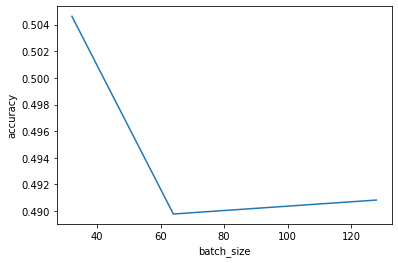

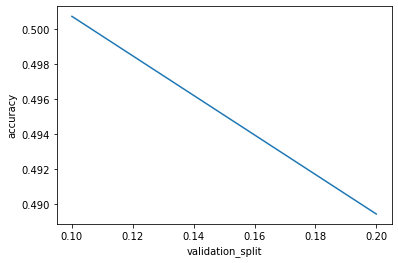

0.503 for {'batch_size': 32, 'validation_split': 0.1}
0.506 for {'batch_size': 32, 'validation_split': 0.2}
0.508 for {'batch_size': 64, 'validation_split': 0.1}
0.471 for {'batch_size': 64, 'validation_split': 0.2}
0.491 for {'batch_size': 128, 'validation_split': 0.1}
0.490 for {'batch_size': 128, 'validation_split': 0.2}


ValueError: ignored

In [17]:
def create_model():
  model = Sequential()
  model.add(Input(shape=(230,)))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

scores = ['accuracy','recall']
for score in scores:
  print(score)
  model = KerasClassifier(build_fn=create_model)
  epochs = np.array([50, 100, 150])
  batches = np.array([5, 10, 20])
  param_grid = {"batch_size":[32,64,128],"validation_split":[0.1,0.2]}
  grid = GridSearchCV(estimator=model, param_grid=param_grid,scoring=score,verbose=5)
  grid_result = grid.fit(combined_X_train, y_train)
  print("Best parameters set found on training data:\n")
  print(grid.best_params_)
  means = grid.cv_results_['mean_test_score']
  print("Mean score: ",means)
  # Plot of score against each hyperparameter
  fig, ax = plt.subplots()
  vs_means = [np.mean(means[::2]),np.mean(means[1::2])]
  bs_means = [np.mean(means[:2]),np.mean(means[2:4]),np.mean(means[4:6])]
  a = ax.plot([32,64,128],bs_means)
  ax.set_xlabel('batch_size')
  ax.set_ylabel(score)
  plt.show()
  fig, ax = plt.subplots()
  a = ax.plot([0.1,0.2],vs_means)
  ax.set_xlabel('validation_split')
  ax.set_ylabel(score)
  plt.show()
  # For each of the two best models - Precision Recall Curve, AUC Curve
  for mean,params in zip(means,grid.cv_results_['params']):
      print("%0.3f for %r"% (mean, params))
  y_score = grid.best_estimator_.predict_proba(combined_X_train)[:,-1]
  precision, recall, _ = precision_recall_curve(y_train, y_score)
  average_precision = average_precision_score(y_train, y_score)
  print("\n For the model with the best "+ score)
  plt.plot(recall, precision, color='b', alpha=0.2)
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title(' Logistic regression 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
  fpr, tpr, _ = roc_curve(y_train, y_score)
  roc_auc = auc(fpr, tpr)
  plt.figure(figsize=(8,8))
  plt.xlim([-0.01, 1.00])
  plt.ylim([-0.01, 1.01])
  plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Logistic regression',roc_auc))
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)
  plt.title('ROC curve', fontsize=16)
  plt.legend(loc='lower right', fontsize=13)
  plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
  plt.axes().set_aspect('equal')
  plt.show()


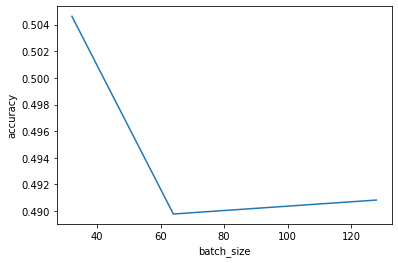

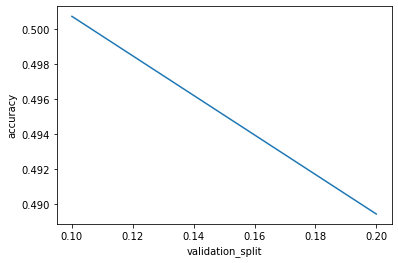

0.503 for {'batch_size': 32, 'validation_split': 0.1}
0.506 for {'batch_size': 32, 'validation_split': 0.2}
0.508 for {'batch_size': 64, 'validation_split': 0.1}
0.471 for {'batch_size': 64, 'validation_split': 0.2}
0.491 for {'batch_size': 128, 'validation_split': 0.1}
0.490 for {'batch_size': 128, 'validation_split': 0.2}

 For the model with the best accuracy


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


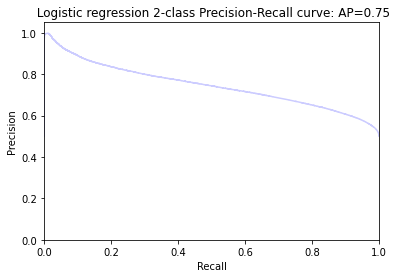

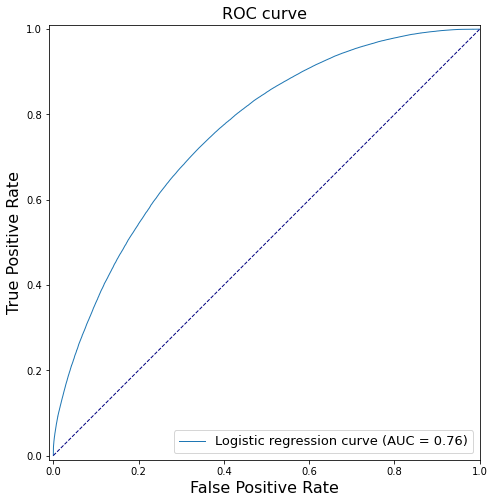

In [19]:
# Fixing the error above and running only the figures
# Plot of score against each hyperparameter
fig, ax = plt.subplots()
vs_means = [np.mean(means[::2]),np.mean(means[1::2])]
bs_means = [np.mean(means[:2]),np.mean(means[2:4]),np.mean(means[4:6])]
a = ax.plot([32,64,128],bs_means)
ax.set_xlabel('batch_size')
ax.set_ylabel(score)
plt.show()
fig, ax = plt.subplots()
a = ax.plot([0.1,0.2],vs_means)
ax.set_xlabel('validation_split')
ax.set_ylabel(score)
plt.show()
# For each of the two best models - Precision Recall Curve, AUC Curve
for mean,params in zip(means,grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
y_score = grid.best_estimator_.predict_proba(combined_X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
print("\n For the model with the best "+ score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' Logistic regression 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Logistic regression',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()


recall
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  after removing the cwd from sys.path.


9378/9378 [==============================] - 38s 4ms/step - loss: 0.5837 - accuracy: 0.6819 - val_loss: 0.5251 - val_accuracy: 0.7135
[CV 1/5] END batch_size=32, validation_split=0.1;, score=0.645 total time=  45.6s
9378/9378 [==============================] - 38s 4ms/step - loss: 0.5833 - accuracy: 0.6836 - val_loss: 0.4846 - val_accuracy: 0.7473
[CV 2/5] END batch_size=32, validation_split=0.1;, score=0.607 total time=  43.6s
9378/9378 [==============================] - 38s 4ms/step - loss: 0.5881 - accuracy: 0.6865 - val_loss: 0.6321 - val_accuracy: 0.6038
[CV 3/5] END batch_size=32, validation_split=0.1;, score=0.766 total time=  42.2s
9378/9378 [==============================] - 39s 4ms/step - loss: 0.5302 - accuracy: 0.7440 - val_loss: 1.0230 - val_accuracy: 0.3245


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END batch_size=32, validation_split=0.1;, score=0.000 total time=  45.7s
9378/9378 [==============================] - 38s 4ms/step - loss: 0.5307 - accuracy: 0.7446 - val_loss: 0.9606 - val_accuracy: 0.4071


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END batch_size=32, validation_split=0.1;, score=0.000 total time=  45.7s
8336/8336 [==============================] - 37s 4ms/step - loss: 0.5947 - accuracy: 0.6754 - val_loss: 0.4889 - val_accuracy: 0.7275
[CV 1/5] END batch_size=32, validation_split=0.2;, score=0.633 total time=  45.7s
8336/8336 [==============================] - 38s 4ms/step - loss: 0.5939 - accuracy: 0.6767 - val_loss: 0.5458 - val_accuracy: 0.6902
[CV 2/5] END batch_size=32, validation_split=0.2;, score=0.671 total time=  43.3s
8336/8336 [==============================] - 37s 4ms/step - loss: 0.5692 - accuracy: 0.7086 - val_loss: 0.8199 - val_accuracy: 0.4735
[CV 3/5] END batch_size=32, validation_split=0.2;, score=0.862 total time=  45.6s
8336/8336 [==============================] - 36s 4ms/step - loss: 0.4584 - accuracy: 0.8020 - val_loss: 1.2664 - val_accuracy: 0.2930


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END batch_size=32, validation_split=0.2;, score=0.000 total time=  42.4s
8336/8336 [==============================] - 37s 4ms/step - loss: 0.4580 - accuracy: 0.8021 - val_loss: 1.2950 - val_accuracy: 0.2080


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END batch_size=32, validation_split=0.2;, score=0.000 total time=  47.4s
4689/4689 [==============================] - 19s 4ms/step - loss: 0.5839 - accuracy: 0.6827 - val_loss: 0.4506 - val_accuracy: 0.7859
[CV 1/5] END batch_size=64, validation_split=0.1;, score=0.554 total time=  26.8s
4689/4689 [==============================] - 20s 4ms/step - loss: 0.5827 - accuracy: 0.6841 - val_loss: 0.4967 - val_accuracy: 0.7458
[CV 2/5] END batch_size=64, validation_split=0.1;, score=0.610 total time=  23.9s
4689/4689 [==============================] - 20s 4ms/step - loss: 0.5885 - accuracy: 0.6861 - val_loss: 0.7185 - val_accuracy: 0.5471
[CV 3/5] END batch_size=64, validation_split=0.1;, score=0.814 total time=  23.8s
4689/4689 [==============================] - 20s 4ms/step - loss: 0.5302 - accuracy: 0.7446 - val_loss: 0.9872 - val_accuracy: 0.3420


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END batch_size=64, validation_split=0.1;, score=0.000 total time=  26.8s
4689/4689 [==============================] - 20s 4ms/step - loss: 0.5310 - accuracy: 0.7438 - val_loss: 0.8918 - val_accuracy: 0.4737


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END batch_size=64, validation_split=0.1;, score=0.000 total time=  25.4s
4168/4168 [==============================] - 19s 4ms/step - loss: 0.5941 - accuracy: 0.6756 - val_loss: 0.5734 - val_accuracy: 0.6784
[CV 1/5] END batch_size=64, validation_split=0.2;, score=0.695 total time=  23.0s
4168/4168 [==============================] - 19s 4ms/step - loss: 0.5936 - accuracy: 0.6774 - val_loss: 0.5675 - val_accuracy: 0.6730
[CV 2/5] END batch_size=64, validation_split=0.2;, score=0.692 total time=  23.2s
4168/4168 [==============================] - 19s 4ms/step - loss: 0.5683 - accuracy: 0.7080 - val_loss: 0.8049 - val_accuracy: 0.5032
[CV 3/5] END batch_size=64, validation_split=0.2;, score=0.846 total time=  23.2s
4168/4168 [==============================] - 19s 4ms/step - loss: 0.4584 - accuracy: 0.8018 - val_loss: 1.3508 - val_accuracy: 0.1746


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END batch_size=64, validation_split=0.2;, score=0.000 total time=  23.1s
4168/4168 [==============================] - 19s 4ms/step - loss: 0.4580 - accuracy: 0.8023 - val_loss: 1.2425 - val_accuracy: 0.2509


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END batch_size=64, validation_split=0.2;, score=0.000 total time=  25.2s
2345/2345 [==============================] - 10s 4ms/step - loss: 0.5838 - accuracy: 0.6823 - val_loss: 0.4487 - val_accuracy: 0.7723
[CV 1/5] END batch_size=128, validation_split=0.1;, score=0.574 total time=  17.0s
2345/2345 [==============================] - 10s 4ms/step - loss: 0.5841 - accuracy: 0.6827 - val_loss: 0.4163 - val_accuracy: 0.8014
[CV 2/5] END batch_size=128, validation_split=0.1;, score=0.527 total time=  14.4s
2345/2345 [==============================] - 10s 4ms/step - loss: 0.5886 - accuracy: 0.6866 - val_loss: 0.6607 - val_accuracy: 0.5910
[CV 3/5] END batch_size=128, validation_split=0.1;, score=0.776 total time=  16.1s
2345/2345 [==============================] - 11s 4ms/step - loss: 0.5306 - accuracy: 0.7435 - val_loss: 0.9913 - val_accuracy: 0.3887


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END batch_size=128, validation_split=0.1;, score=0.000 total time=  16.4s
2345/2345 [==============================] - 10s 4ms/step - loss: 0.5309 - accuracy: 0.7433 - val_loss: 1.0360 - val_accuracy: 0.3692


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END batch_size=128, validation_split=0.1;, score=0.000 total time=  14.4s
2084/2084 [==============================] - 10s 5ms/step - loss: 0.5945 - accuracy: 0.6750 - val_loss: 0.5336 - val_accuracy: 0.7169
[CV 1/5] END batch_size=128, validation_split=0.2;, score=0.649 total time=  15.8s
2084/2084 [==============================] - 10s 5ms/step - loss: 0.5963 - accuracy: 0.6749 - val_loss: 0.4659 - val_accuracy: 0.7588
[CV 2/5] END batch_size=128, validation_split=0.2;, score=0.592 total time=  15.7s
2084/2084 [==============================] - 10s 4ms/step - loss: 0.5693 - accuracy: 0.7081 - val_loss: 0.8401 - val_accuracy: 0.4451
[CV 3/5] END batch_size=128, validation_split=0.2;, score=0.881 total time=  14.9s
2084/2084 [==============================] - 10s 4ms/step - loss: 0.4593 - accuracy: 0.8017 - val_loss: 1.2589 - val_accuracy: 0.2595


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 4/5] END batch_size=128, validation_split=0.2;, score=0.000 total time=  16.5s
2084/2084 [==============================] - 10s 4ms/step - loss: 0.4585 - accuracy: 0.8014 - val_loss: 1.2182 - val_accuracy: 0.2319


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV 5/5] END batch_size=128, validation_split=0.2;, score=0.000 total time=  14.9s
5210/5210 [==============================] - 26s 5ms/step - loss: 0.5668 - accuracy: 0.7096 - val_loss: 0.7723 - val_accuracy: 0.5165
Best parameters set found on training data:

{'batch_size': 64, 'validation_split': 0.2}
Mean score:  [0.40377794 0.43306074 0.39576176 0.44644934 0.37540023 0.4243198 ]


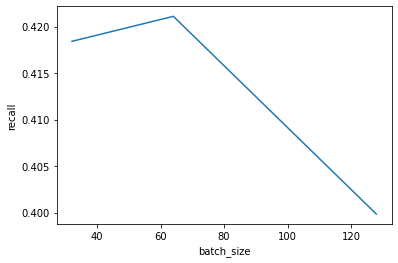

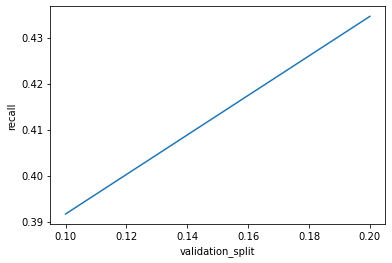

0.404 for {'batch_size': 32, 'validation_split': 0.1}
0.433 for {'batch_size': 32, 'validation_split': 0.2}
0.396 for {'batch_size': 64, 'validation_split': 0.1}
0.446 for {'batch_size': 64, 'validation_split': 0.2}
0.375 for {'batch_size': 128, 'validation_split': 0.1}
0.424 for {'batch_size': 128, 'validation_split': 0.2}

 For the model with the best recall


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


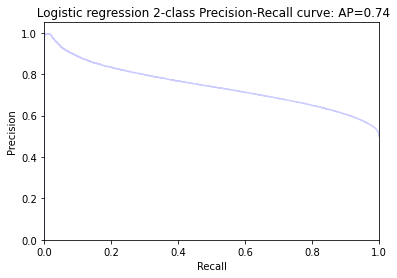

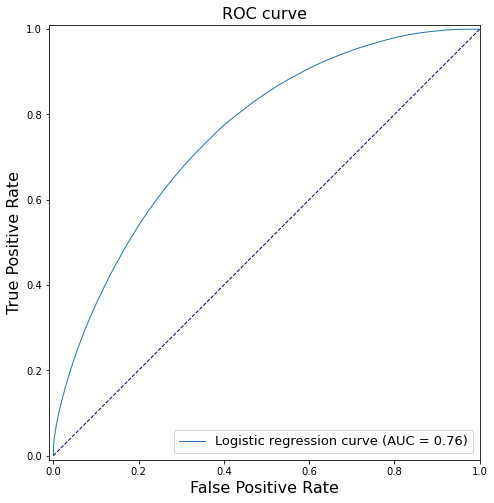

In [21]:
# Repeating for recall
score = 'recall'
print(score)
model = KerasClassifier(build_fn=create_model)
epochs = np.array([50, 100, 150])
batches = np.array([5, 10, 20])
param_grid = {"batch_size":[32,64,128],"validation_split":[0.1,0.2]}
grid = GridSearchCV(estimator=model, param_grid=param_grid,scoring=score,verbose=5)
grid_result = grid.fit(combined_X_train, y_train)
print("Best parameters set found on training data:\n")
print(grid.best_params_)
means = grid.cv_results_['mean_test_score']
print("Mean score: ",means)
# Plot of score against each hyperparameter
fig, ax = plt.subplots()
vs_means = [np.mean(means[::2]),np.mean(means[1::2])]
bs_means = [np.mean(means[:2]),np.mean(means[2:4]),np.mean(means[4:6])]
a = ax.plot([32,64,128],bs_means)
ax.set_xlabel('batch_size')
ax.set_ylabel(score)
plt.show()
fig, ax = plt.subplots()
a = ax.plot([0.1,0.2],vs_means)
ax.set_xlabel('validation_split')
ax.set_ylabel(score)
plt.show()
# For each of the two best models - Precision Recall Curve, AUC Curve
for mean,params in zip(means,grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
y_score = grid.best_estimator_.predict_proba(combined_X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
print("\n For the model with the best "+ score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' Logistic regression 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Logistic regression',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()
